# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

# 데이터 분석부터 먼저 시작해보겠습니다.
### "구별 등록인구 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.3 seoul_people.csv

[데이터 소개]
* 서울 시 주민 등록 데이터

[변수 소개]
* 한국인 / 등록 외국인 / 합계 / 세대수 / 고령인구수

# 1.데이터 불러오기
### 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* '1.3 seoul_people.csv'파일을 'seoul_people' 변수에 저장하고 그 Shape을 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * cp949 인코더를 사용해 주세요

In [2]:
import pandas as pd

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_people = pd.read_csv('1.3 seoul_people.csv',sep="\t", encoding = 'cp949')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_people.shape

(28, 14)

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_people' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.describe()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
count,28,28,28,28,28,28,28,28,28,28,28,28,28,28
unique,2,27,27,28,28,28,28,28,28,28,28,28,24,27
top,2022.1/4,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
freq,26,2,2,1,1,1,1,1,1,1,1,1,2,2


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보고, 어느 데이터만 가져와야 할지 생각 해 봅시다.

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [4]:
# 해당 데이터프레임을 'df_seoul_people.csv' 파일로 저장하세요.

# 2행을 열이름으로 지정
seoul_people = pd.read_csv('1.3 seoul_people.csv', sep="\t", encoding = "cp949", header = 2)
seoul_people.head() 

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
1,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
2,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
3,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
4,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896


In [5]:
# 합게 행은 필요 없는 것 같아서 삭제
seoul_people.drop(index=0,inplace=True)

In [6]:
seoul_people.sort_values('계',ascending=False)

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
24,2022.1/4,송파구,285106,668261,321963,346298,662607,319407,343200,5654,2556,3098,2.32,99854
16,2022.1/4,강서구,272572,578426,277797,300629,573046,275422,297624,5380,2375,3005,2.10,93924
23,2022.1/4,강남구,234612,537338,257096,280242,532577,254866,277711,4761,2230,2531,2.27,79575
11,2022.1/4,노원구,219065,514445,247417,267028,510486,245663,264823,3959,1754,2205,2.33,89426
21,2022.1/4,관악구,279353,500336,250450,249886,486375,244409,241966,13961,6041,7920,1.74,80686
12,2022.1/4,은평구,215178,476013,227172,248841,472259,225640,246619,3754,1532,2222,2.19,88418
25,2022.1/4,강동구,201926,465097,227891,237206,461300,226203,235097,3797,1688,2109,2.28,75477
15,2022.1/4,양천구,181765,449378,219882,229496,446182,218554,227628,3196,1328,1868,2.45,69953
8,2022.1/4,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.20,75719
17,2022.1/4,구로구,181916,419984,208027,211957,396017,195002,201015,23967,13025,10942,2.18,73864


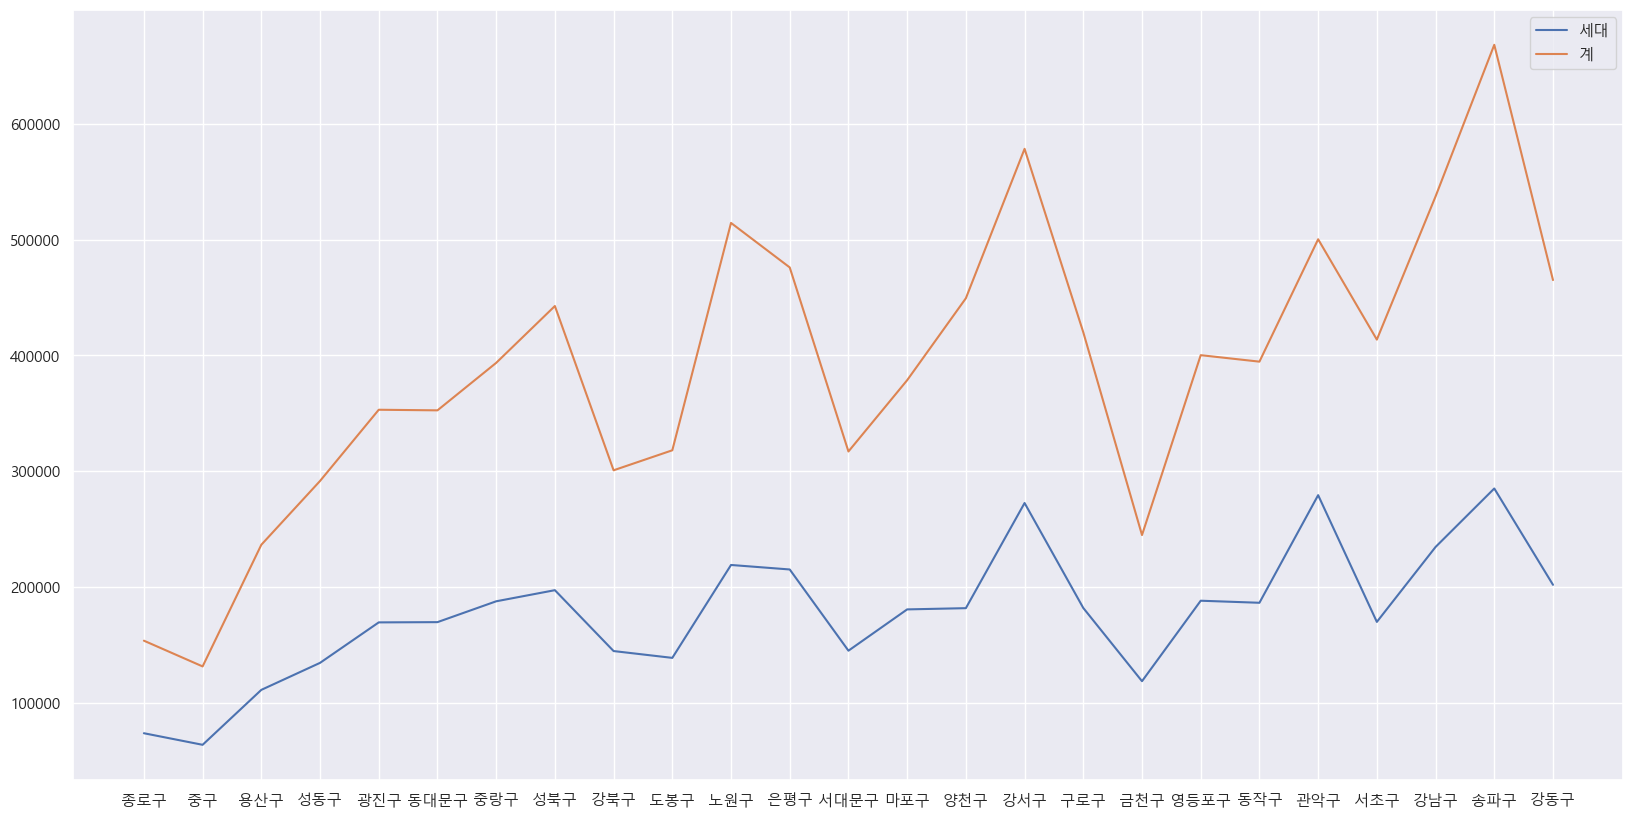

In [20]:
# 구별 세대수와 인구수
plt.figure(figsize=(20,10))
plt.plot('자치구','세대',data=seoul_people)
plt.plot('자치구','계',data=seoul_people)
plt.legend()

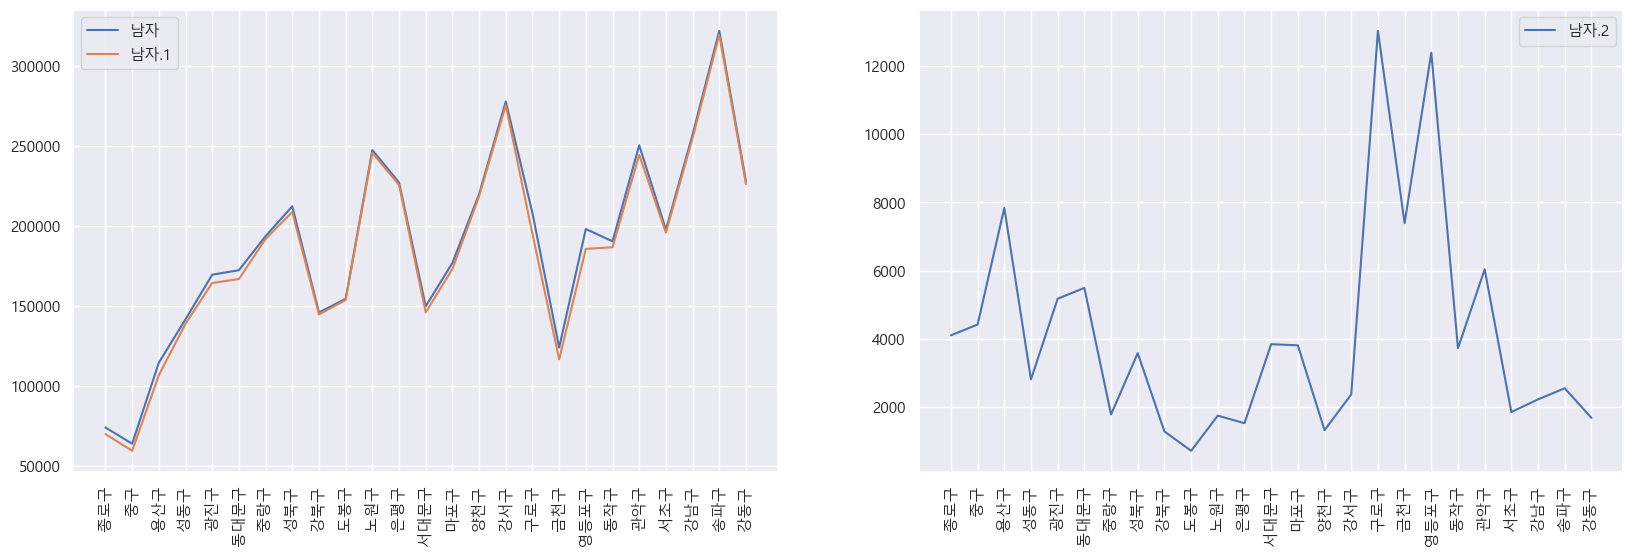

In [60]:
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

# 구별 전체 남성과 한국인 남성의 수
ax1.plot('자치구','남자',data=seoul_people)
ax1.plot('자치구','남자.1',data=seoul_people)
ax1.set_xticks(seoul_people['자치구'])
ax1.set_xticklabels(seoul_people['자치구'],rotation=90)
ax1.legend()

# 구별 등록외국인의 남성의 수
ax2.plot('자치구','남자.2',data=seoul_people)
ax2.set_xticks(seoul_people['자치구'])
ax2.set_xticklabels(seoul_people['자치구'],rotation=90)
plt.legend()

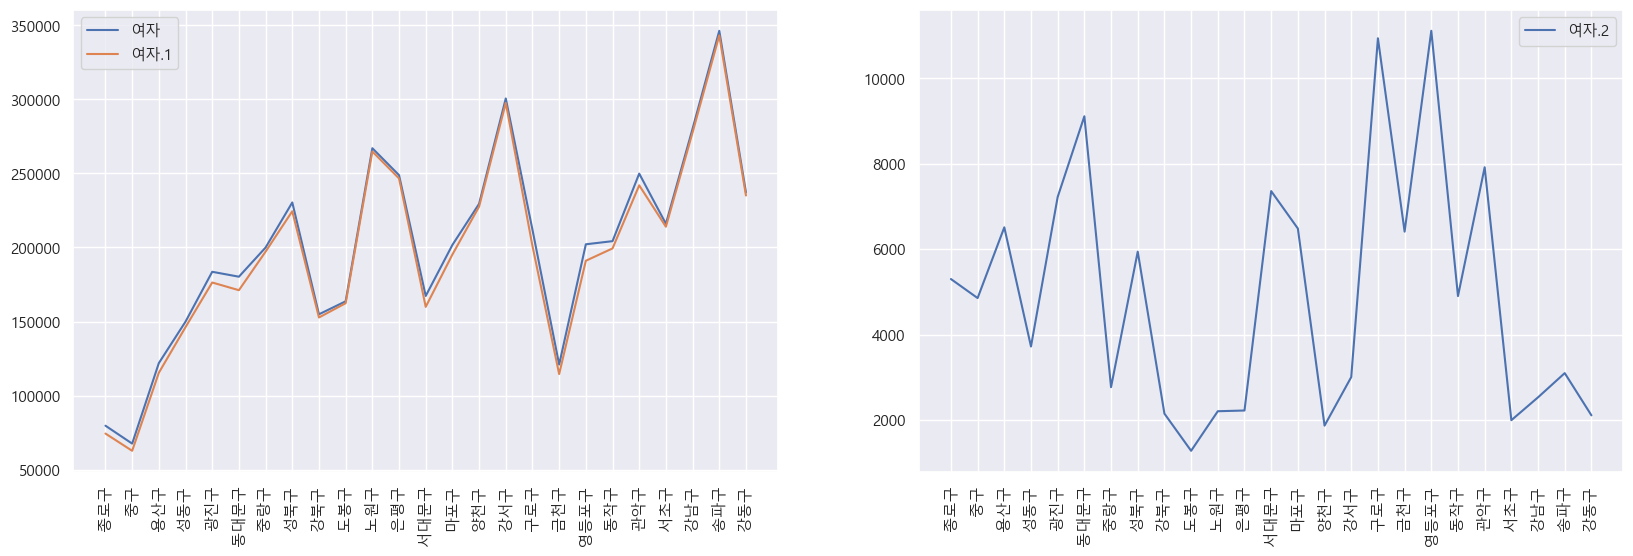

In [61]:
fig=plt.figure(figsize=(20,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

# 구별 전체 여성과 한국인 여성의 수
ax1.plot('자치구','여자',data=seoul_people)
ax1.plot('자치구','여자.1',data=seoul_people)
ax1.set_xticks(seoul_people['자치구'])
ax1.set_xticklabels(seoul_people['자치구'],rotation=90)
ax1.legend()

# 구별 등록외국인의 여성의 수
ax2.plot('자치구','여자.2',data=seoul_people)
ax2.set_xticks(seoul_people['자치구'])
ax2.set_xticklabels(seoul_people['자치구'],rotation=90)
plt.legend()

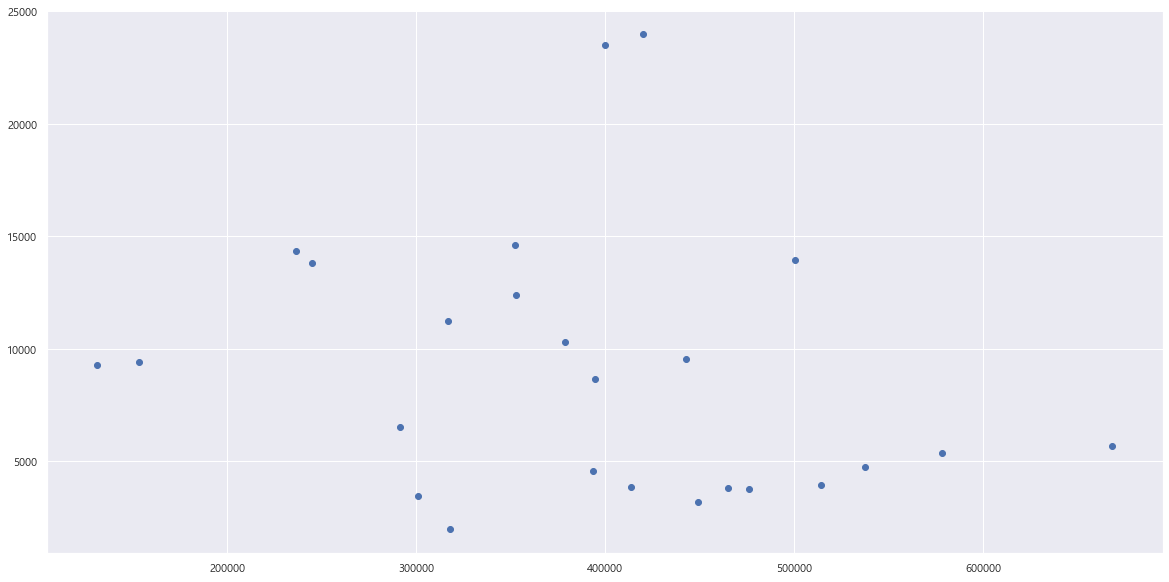

In [16]:
# 전체 인구와 등록외국인의 산점도
plt.figure(figsize=(20,10))
plt.scatter('계','계.2',data=seoul_people)

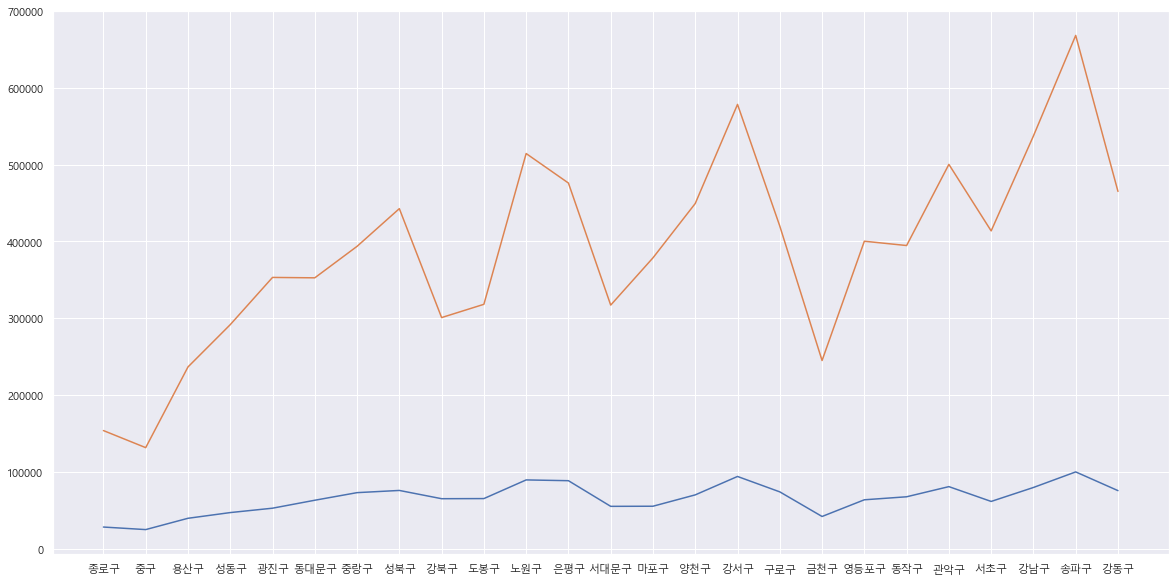

In [9]:
# 전체 인구와 65세이상고령자의 수
plt.figure(figsize=(20,10))
plt.plot('자치구','65세이상고령자',data=seoul_people)
plt.plot('자치구','계',data=seoul_people)

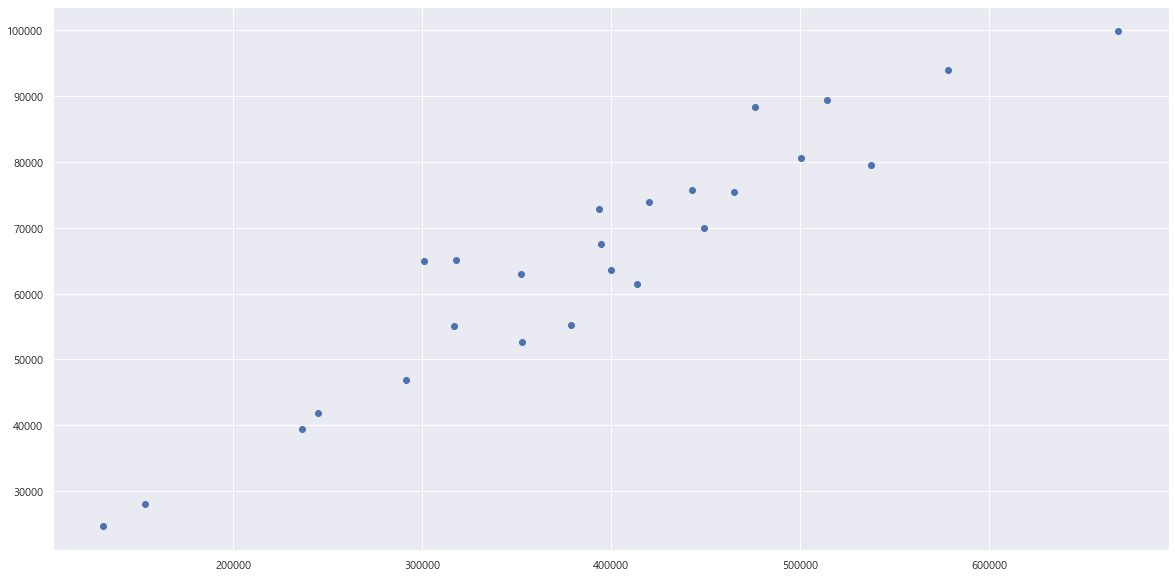

In [12]:
# 전체 인구와 65세이상고령자의 산점도
plt.figure(figsize=(20,10))
plt.scatter('계','65세이상고령자',data=seoul_people)

Text(0.5, 1.0, '상관관계')

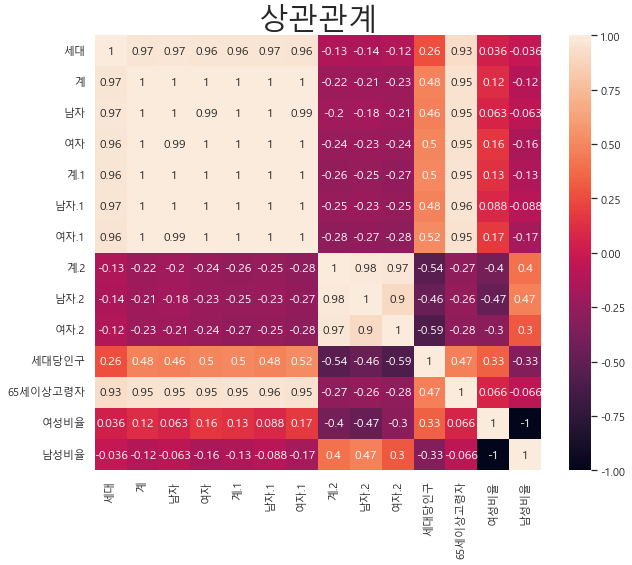

In [29]:
cor=seoul_people.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

In [7]:
seoul_people = seoul_people[['자치구','계','남자','여자','65세이상고령자']]
seoul_people.head()

,자치구,계,남자,여자,65세이상고령자
1,종로구,153684,74018,79666,28064
2,중구,131450,63869,67581,24742
3,용산구,236518,114571,121947,39461
4,성동구,291609,141662,149947,46896
5,광진구,353110,169525,183585,52604


In [8]:
seoul_people.to_csv("df_seoul_people.csv", index = False)

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [7]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

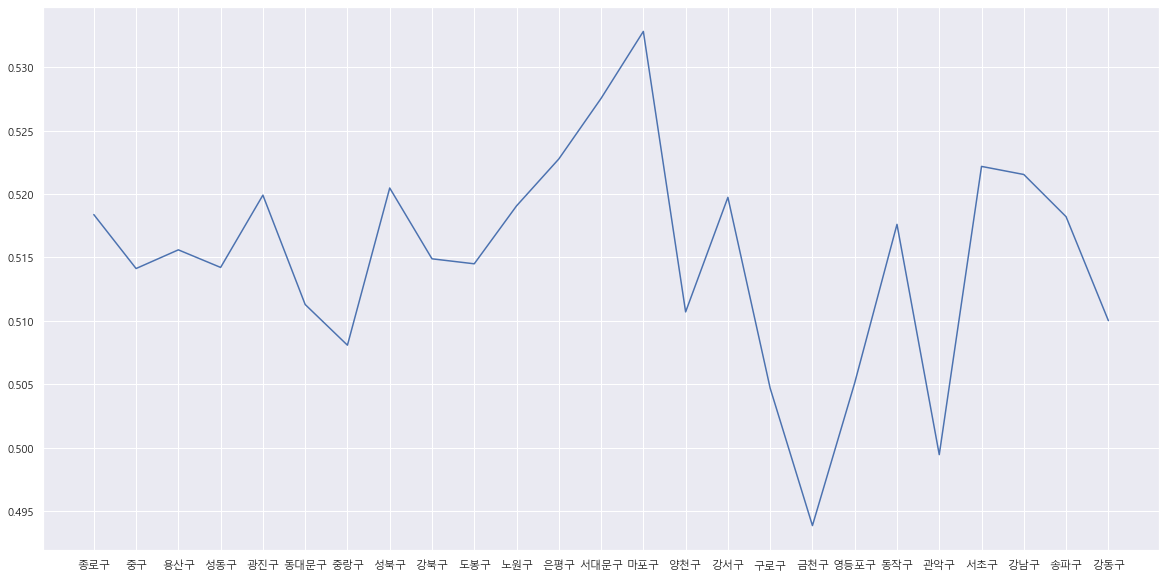

In [26]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 구별 여성인구의 비율
seoul_people['여성비율']=seoul_people['여자']/seoul_people['계']
plt.figure(figsize=(20,10))
plt.plot('자치구','여성비율',data=seoul_people)

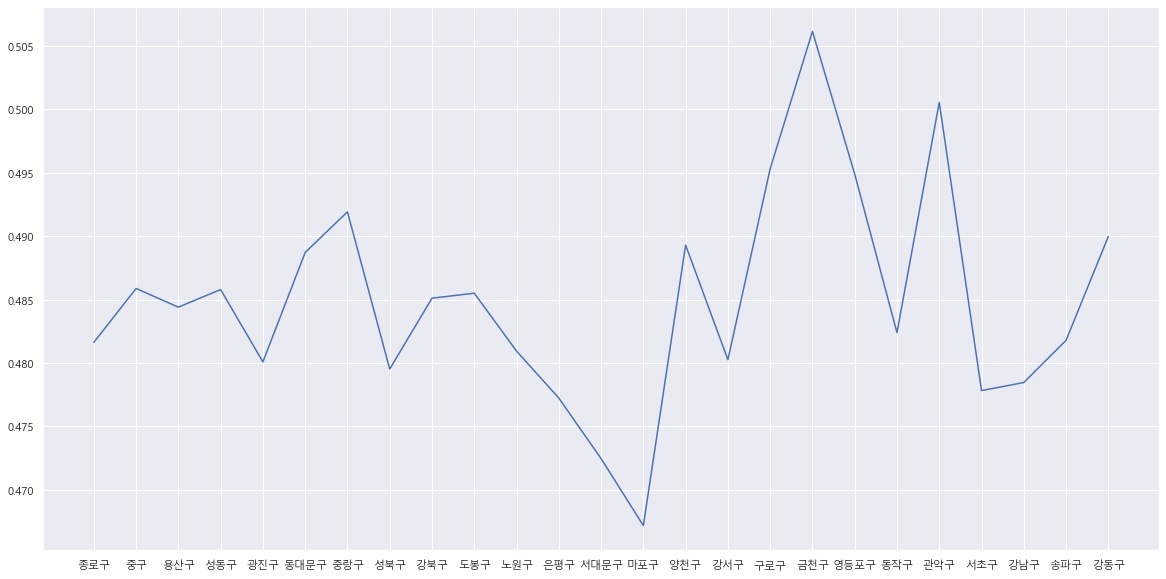

In [27]:
# 구별 남성인구의 비율
seoul_people['남성비율']=seoul_people['남자']/seoul_people['계']
plt.figure(figsize=(20,10))
plt.plot('자치구','남성비율',data=seoul_people)

# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 등록외국인과 전체 인구는 음의 상관관계. 따라서 등록외국인은 제외
# 2. 여성, 남성이 많은 구는 송파구지만 비율로 보면 남성은 금천구, 여성은 마포구가 많음
# 3. 65세이상고령자와 전체 인구는 양의 상관관계. 따라서 인구가 많은 구가 고령자도 많을 확률이 큼

---